# The Sparks Foundation - Graduate Rotational Internship Program

## Name : Ausaf Fatima

## Task : Exploratory Data Analysis - Terrorism

### Description: Perform 'Exploratory Data Analysis' on dataset 'Global Terrorism'. As a security/defense analyst, try to find out the hot zone of terrorism. What all security issues and insights you can derive by EDA? 

Importing the initial libraries required.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly as px
import plotly.express as px

Setting the style.

In [2]:
sns.set_style('dark')
plt.style.use('seaborn-deep')

Reading the data from the csv file and taking a look at it.

In [3]:
df = pd.read_csv('globalTerrorism.csv', engine='python')

In [4]:
pd.set_option('display.max_columns', None)
df.head() 

eventid  iyear  imonth  iday approxdate  extended resolution  country  \
0  197000000001   1970       7     2        NaN         0        NaN       58   
1  197000000002   1970       0     0        NaN         0        NaN      130   
2  197001000001   1970       1     0        NaN         0        NaN      160   
3  197001000002   1970       1     0        NaN         0        NaN       78   
4  197001000003   1970       1     0        NaN         0        NaN      101   

          country_txt  region                   region_txt provstate  \
0  Dominican Republic       2  Central America & Caribbean       NaN   
1              Mexico       1                North America   Federal   
2         Philippines       5               Southeast Asia    Tarlac   
3              Greece       8               Western Europe    Attica   
4               Japan       4                    East Asia   Fukouka   

            city   latitude   longitude  specificity  vicinity location  \
0  Santo Domingo  18.456792  -69.951164          1.0         0      NaN   
1    Mexico city  19.371887  -99.086624          1.0         0      NaN   
2        Unknown  15.478598  120.599741          4.0         0      NaN   
3         Athens  37.997490   23.762728          1.0         0      NaN   
4        Fukouka  33.580412  130.396361          1.0         0      NaN   

  summary  crit1  crit2  crit3  doubtterr  alternative alternative_txt  \
0     NaN      1      1      1        0.0          NaN             NaN   
1     NaN      1      1      1        0.0          NaN             NaN   
2     NaN      1      1      1        0.0          NaN             NaN   
3     NaN      1      1      1        0.0          NaN             NaN   
4     NaN      1      1      1       -9.0          NaN             NaN   

   multiple  success  suicide  attacktype1                 attacktype1_txt  \
0       0.0        1        0            1                   Assassination   
1       0.0        1        0            6     Hostage Taking (Kidnapping)   
2       0.0        1        0            1                   Assassination   
3       0.0        1        0            3               Bombing/Explosion   
4       0.0        1        0            7  Facility/Infrastructure Attack   

   attacktype2 attacktype2_txt  attacktype3 attacktype3_txt  targtype1  \
0          NaN             NaN          NaN             NaN         14   
1          NaN             NaN          NaN             NaN          7   
2          NaN             NaN          NaN             NaN         10   
3          NaN             NaN          NaN             NaN          7   
4          NaN             NaN          NaN             NaN          7   

                 targtype1_txt  targsubtype1  \
0  Private Citizens & Property          68.0   
1      Government (Diplomatic)          45.0   
2          Journalists & Media          54.0   
3      Government (Diplomatic)          46.0   
4      Government (Diplomatic)          46.0   

                                    targsubtype1_txt  \
0                                     Named Civilian   
1  Diplomatic Personnel (outside of embassy, cons...   
2                    Radio Journalist/Staff/Facility   
3                                  Embassy/Consulate   
4                                  Embassy/Consulate   

                         corp1                  target1  natlty1  \
0                          NaN             Julio Guzman     58.0   
1  Belgian Ambassador Daughter  Nadine Chaval, daughter     21.0   
2             Voice of America                 Employee    217.0   
3                          NaN             U.S. Embassy    217.0   
4                          NaN           U.S. Consulate    217.0   

          natlty1_txt  targtype2 targtype2_txt  targsubtype2 targsubtype2_txt  \
0  Dominican Republic        NaN           NaN           NaN              NaN   
1             Belgium        NaN           NaN           NaN              NaN   


A codebook explaining all the above columns in detail is present in this folder.

In [5]:
df.shape

(181691, 135)

In [6]:
pd.set_option('display.max_rows', None)
df.isnull().sum()

eventid                    0
iyear                      0
imonth                     0
iday                       0
approxdate            172452
extended                   0
resolution            179471
country                    0
country_txt                0
region                     0
region_txt                 0
provstate                421
city                     434
latitude                4556
longitude               4557
specificity                6
vicinity                   0
location              126196
summary                66129
crit1                      0
crit2                      0
crit3                      0
doubtterr                  1
alternative           152680
alternative_txt       152680
multiple                   1
success                    0
suicide                    0
attacktype1                0
attacktype1_txt            0
attacktype2           175377
attacktype2_txt       175377
attacktype3           181263
attacktype3_txt       181263
targtype1     

Looking at the values of the year, month and day column to determine the range of our data.

In [7]:
df['iyear'].unique()

array([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980,
       1981, 1986, 1982, 1983, 1984, 1985, 1987, 1988, 1989, 1990, 1991,
       1992, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003,
       2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014,
       2015, 2016, 2017], dtype=int64)

In [8]:
df['imonth'].unique()

array([ 7,  0,  1,  2,  3,  4,  5,  6,  8,  9, 10, 11, 12], dtype=int64)

In [9]:
df['iday'].unique()

array([ 2,  0,  1,  3,  6,  8,  9, 10, 11, 12, 13, 14, 15, 19, 20, 21, 22,
       25, 26, 27, 28, 30, 31,  4,  7, 16, 17, 18, 23, 24,  5, 29],
      dtype=int64)

Replacing 0 with null as months and days start from 1.

In [10]:
df['imonth'] = df['imonth'].replace(0, np.nan)
df['iday'] = df['iday'].replace(0, np.nan)

Visualisation of terrorist attacks over the years.

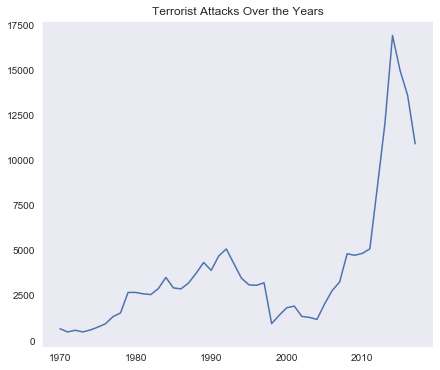

In [11]:
plt.figure(figsize=(7,6))
plt.title('Terrorist Attacks Over the Years')
sns.lineplot(data=df.groupby('iyear').size())

It is observed that terrorist attacks had a sharp increase after 2010 and then a gradual decrease.

Looking at the month and day wise terrorist attacks.

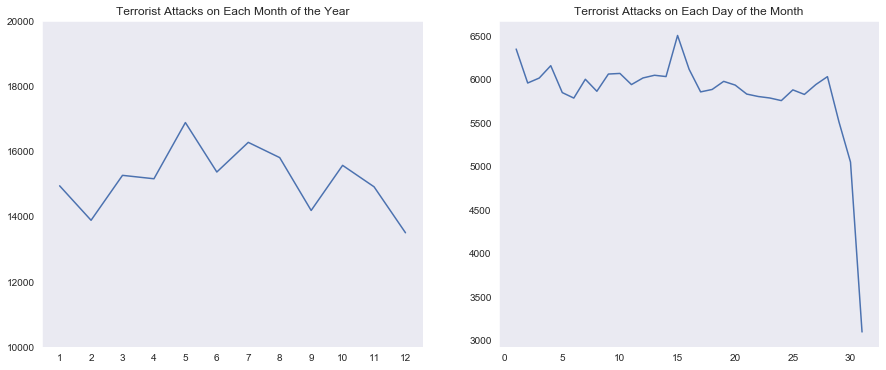

In [12]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

ax[0].set_ylim(10000, 20000)
ax[0].set_xticks([1,2,3,4,5,6,7,8,9,10,11,12])
sns.lineplot(data=df.groupby('imonth').size(), ax=ax[0])
ax[0].set_title('Terrorist Attacks on Each Month of the Year')

ax[1].set_title('Terrorist Attacks on Each Day of the Month')
sns.lineplot(data=df.groupby('iday').size(), ax=ax[1])

No particular trend is observed. The 31st day has less attacks because not all months have 31 days.

Checking how many attacks were extended for a period of over 24 hours.

(-1.1080469108498647,
 1.1003831920555451,
 -1.107827617676217,
 1.1070605433359375)

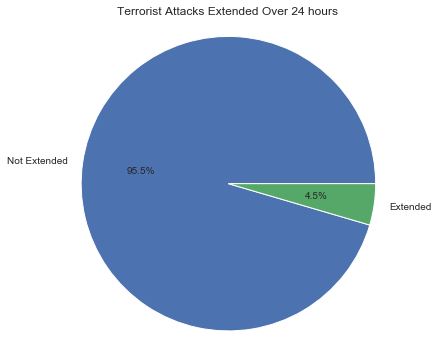

In [13]:
plt.figure(figsize=(7,6))
plt.pie(df.groupby('extended').size(), labels=['Not Extended', 'Extended'], autopct='%1.1f%%')
plt.title('Terrorist Attacks Extended Over 24 hours')
plt.axis('equal')

It is observed that most attacks are not extended for over 24 hours.

Looking at the percentage of attacks which were connected with other attacks.

(-1.1065189492984797,
 1.1003104261570704,
 -1.1032264094836757,
 1.1067888863586612)

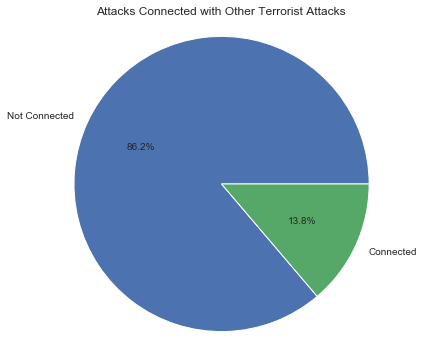

In [14]:
plt.figure(figsize=(7,6))
plt.pie(df.groupby('multiple').size(), labels=['Not Connected', 'Connected'], autopct='%1.1f%%')
plt.title('Attacks Connected with Other Terrorist Attacks')
plt.axis('equal')

It is observed that most attacks are not connected to any others, however, 13.8% of attacks being connected is still a decent number.

Attacks in which the perpetrator/s committed suicide and its comparision over the years.

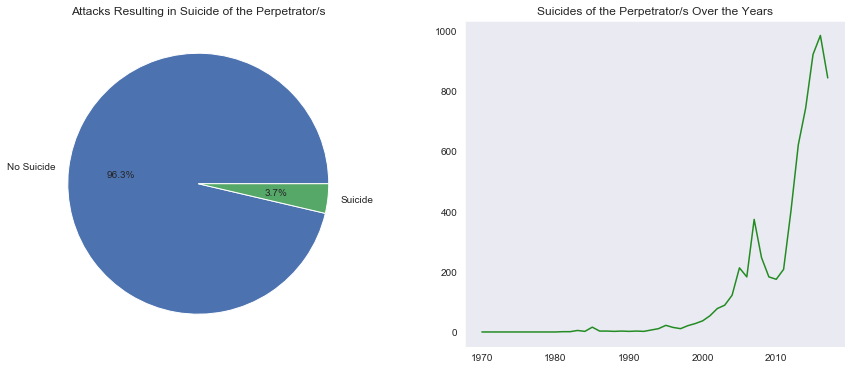

In [15]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

ax[0].pie(df.groupby('suicide').size(), labels=['No Suicide', 'Suicide'], autopct='%1.1f%%')
ax[0].set_title('Attacks Resulting in Suicide of the Perpetrator/s')

ax[1].set_title('Suicides of the Perpetrator/s Over the Years')
sns.lineplot(data=df.groupby('iyear')['suicide'].sum(), ax=ax[1], color='forestgreen')

Most attackers do not commit suicide. But the number of perpetrator/s committing suicide had a sharp increase after 2010.

Types of terrorist attacks with their popularity.

Text(0.5, 1.0, 'Terrorist Attacks and their Frequencies')

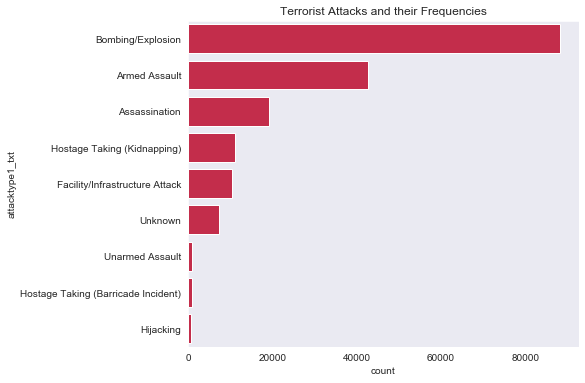

In [16]:
plt.figure(figsize=(7,6))
sns.countplot(y=df['attacktype1_txt'].sort_values(), order=df['attacktype1_txt'].value_counts().index, color='crimson')
plt.title('Terrorist Attacks and their Frequencies')

Bombing and Armed Assault are the most frequent types of terrorist attacks.

Frequencies of the second attack following the first, if any.

Text(0.5, 1.0, 'Second Terrorist Attacks and their Frequencies')

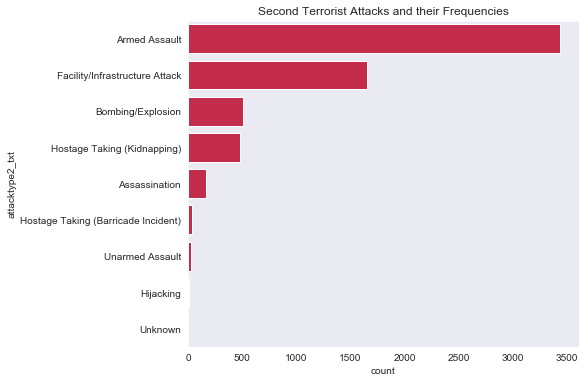

In [17]:
plt.figure(figsize=(7,6))
sns.countplot(y=df['attacktype2_txt'].sort_values(), order=df['attacktype2_txt'].value_counts().index, color='crimson')
plt.title('Second Terrorist Attacks and their Frequencies')

If a second attack occurs after the first, it is most likely to be an armed assault or an infrastructure attack.

Frequencies of the third attack following the first two, if any.

Text(0.5, 1.0, 'Third Terrorist Attacks and their Frequencies')

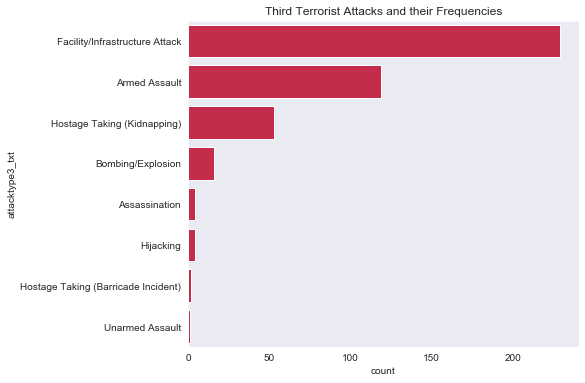

In [18]:
plt.figure(figsize=(7,6))
sns.countplot(y=df['attacktype3_txt'].sort_values(), order=df['attacktype3_txt'].value_counts().index, color='crimson')
plt.title('Third Terrorist Attacks and their Frequencies')

If a third attack occurs, it is most likely to be an infrastructure attack. An armed assault also has decent frequency.

Successful Terrorist Attacks.

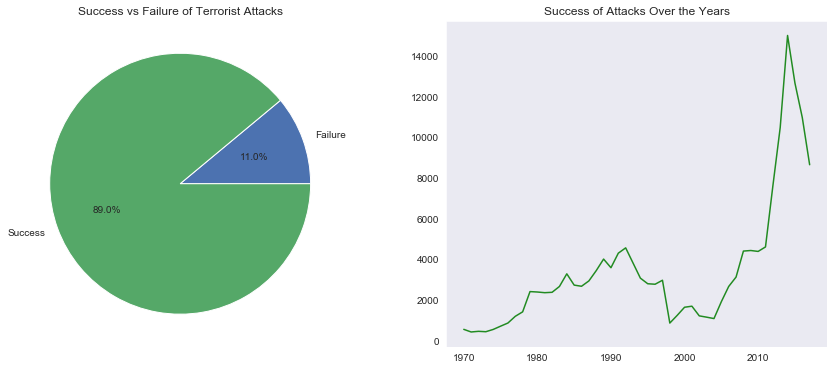

In [19]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
ax[0].pie(df.groupby('success').size(), labels=['Failure', 'Success'], autopct='%1.1f%%')
ax[0].set_title('Success vs Failure of Terrorist Attacks')

ax[1].set_title('Success of Attacks Over the Years')
sns.lineplot(data=df.groupby('iyear')['success'].sum(), ax=ax[1], color='forestgreen')

Most terrorist attacks are successful, with the success seeing a sharp spike after 2010 and a gradual decrease after that.

Most popular terrorist groups.

Text(0.5, 1.0, 'Most Popular Terrorist Groups')

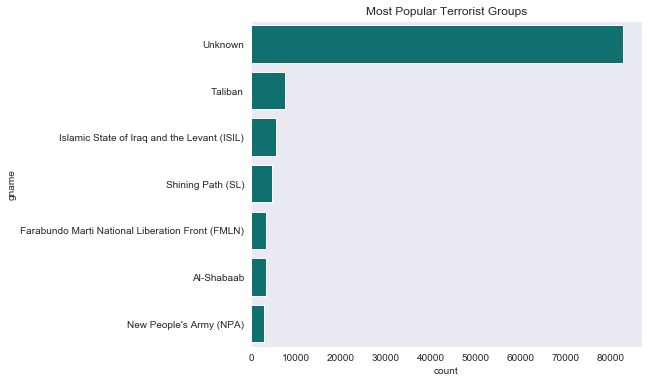

In [20]:
plt.figure(figsize=(7,6))
sns.countplot(y=df['gname'].sort_values(), order=df['gname'].value_counts().nlargest(7).index, color='teal')
plt.title('Most Popular Terrorist Groups')

The groups carrying out the most terrorist attacks are unknown. The most popular known group is the Taliban.

Top numbers of perpetrators carrying out the terrorist attacks and the frequency of them getting caught.

Text(0.5, 1.0, 'Frequency of Perpetrators Caught')

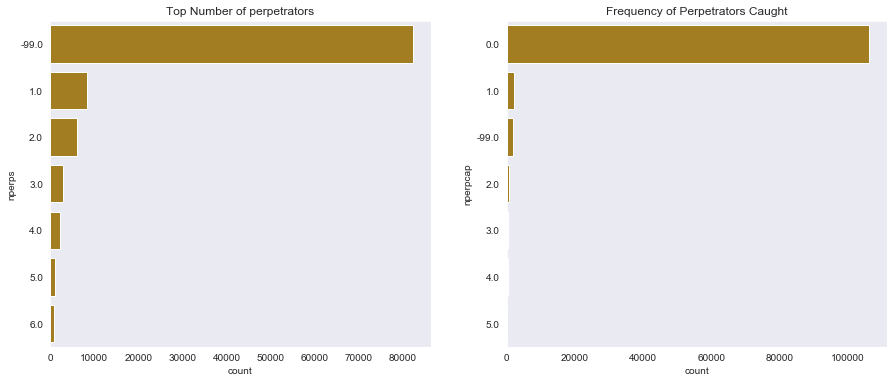

In [21]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
sns.countplot(y=df['nperps'].sort_values(), order=df['nperps'].value_counts().nlargest(7).index, 
              ax=ax[0], color='darkgoldenrod')
ax[0].set_title('Top Number of perpetrators')

sns.countplot(y=df['nperpcap'].sort_values(), order=df['nperpcap'].value_counts().nlargest(7).index, ax=ax[1], 
              color='darkgoldenrod')
ax[1].set_title('Frequency of Perpetrators Caught')

In most attacks, the number of perpetrators are unknown, followed by a single terrorist. Sadly, most terrorists get away with the attacks.

Whether anyone claimed responsibility for a particular attack. And the mode of claiming responsibility, in the case that responsibility was claimed.

Text(0.5, 1.0, 'Claim Mode')

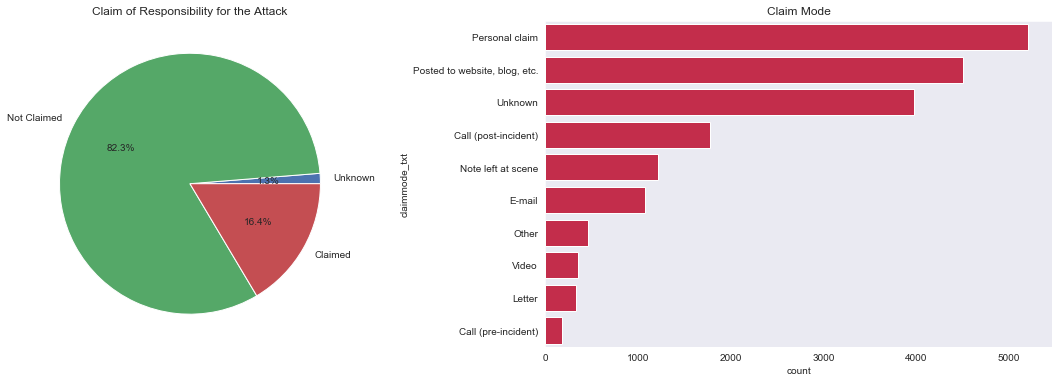

In [22]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))

ax[0].pie(df.groupby('claimed').size(), labels=['Unknown', 'Not Claimed', 'Claimed'], autopct='%1.1f%%')
ax[0].set_title('Claim of Responsibility for the Attack')
#ax[0].axis('equal')

sns.countplot(y=df['claimmode_txt'].sort_values(), order=df['claimmode_txt'].value_counts().index, ax=ax[1], color='crimson')
ax[1].set_title('Claim Mode')

Most attacks have not been claimed by anyone. However, 16.4% attacks being claimed is still a decent number.

Most claims have been personal, closely followed by a post to a website, blog etc. The fact that a category of pre-incident call even exists just shows how these terrorists have no fear.

Targets of the terrorist attacks according to their frequencies.

Text(0.5, 1.0, 'Targets of the Terrorist Attacks')

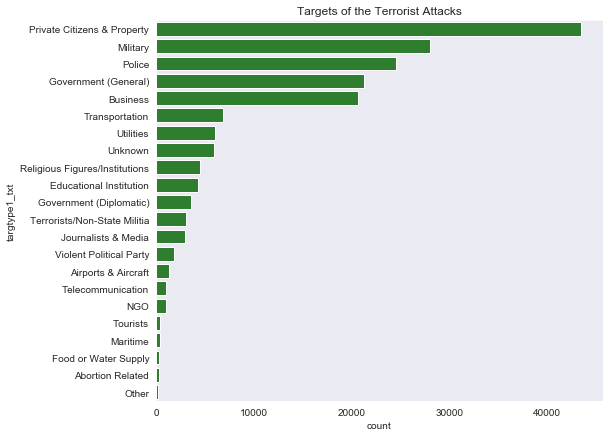

In [23]:
plt.figure(figsize=(8,7))
sns.countplot(y=df['targtype1_txt'].sort_values(), order=df['targtype1_txt'].value_counts().index, color='forestgreen')
plt.title('Targets of the Terrorist Attacks')

Most terrorists target private citizens & properties, followed by the military and police.

Most popular types of weapons used.

Text(0.5, 1.0, 'Most Frequently Used Weapons')

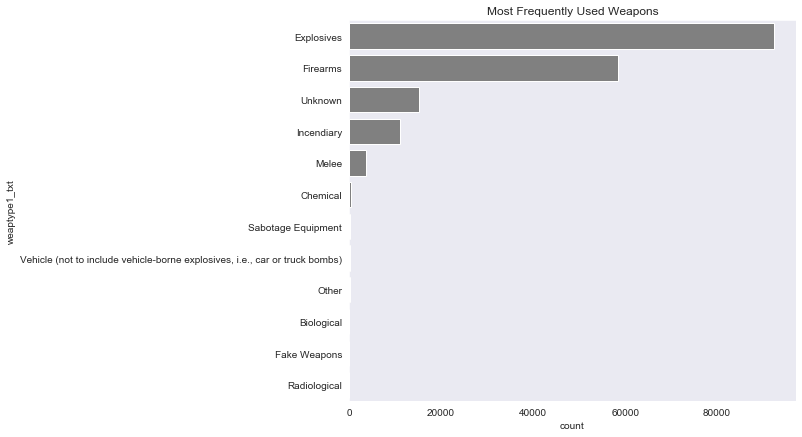

In [24]:
plt.figure(figsize=(8,7))
sns.countplot(y=df['weaptype1_txt'].sort_values(), order=df['weaptype1_txt'].value_counts().index, color='gray')
plt.title('Most Frequently Used Weapons')

Explosives and firearms are the most frequently used weapons.

Most frequent number of people killed and wounded in terrorist attacks.

Text(0.5, 1.0, 'Most Frequent Number of People Wounded')

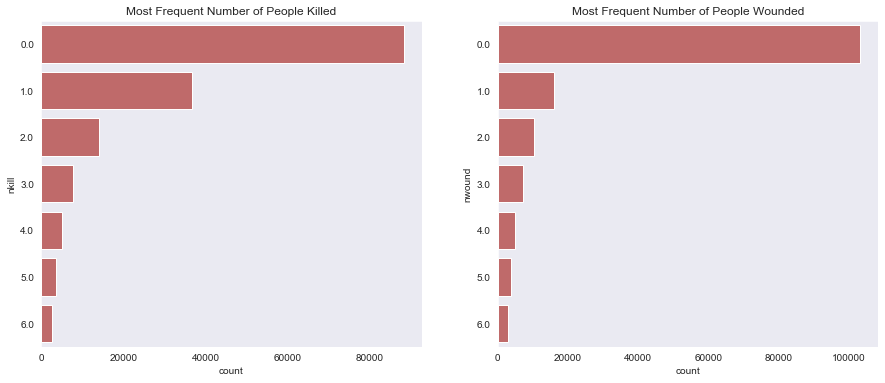

In [25]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(y=df['nkill'].sort_values(), order=df['nkill'].value_counts().nlargest(7).index, ax=ax[0], color='indianred')
ax[0].set_title('Most Frequent Number of People Killed')

sns.countplot(y=df['nwound'].sort_values(), order=df['nwound'].value_counts().nlargest(7).index, ax=ax[1], color='indianred')
ax[1].set_title('Most Frequent Number of People Wounded')

Thankfully, most attacks do not result in deaths and injuries but the numbers of the ones resulting in them are also high.

Number of People Killed and Wounded Over the Years.

Text(0.5, 1.0, 'Number of People Wounded Over the Years')

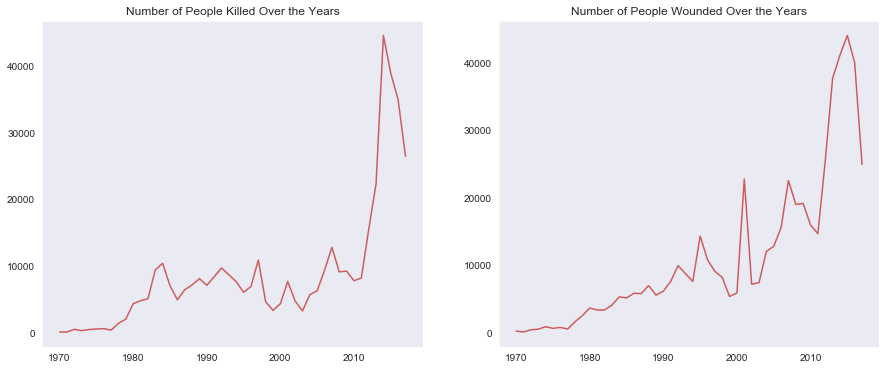

In [26]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

sns.lineplot(data=df.groupby('iyear')['nkill'].sum(), ax=ax[0], color='indianred')
ax[0].set_title('Number of People Killed Over the Years')

sns.lineplot(data=df.groupby('iyear')['nwound'].sum(), ax=ax[1], color='indianred')
ax[1].set_title('Number of People Wounded Over the Years')

Number of people killed and wounded in terrorist attacks saw a sharp increase after 2010 and a gradual decrease after that.

Number of perpetrator/s killed and its change over the years.

Text(0.5, 1.0, 'Number of Perpetrator/s Killed in Attacks Over the Years')

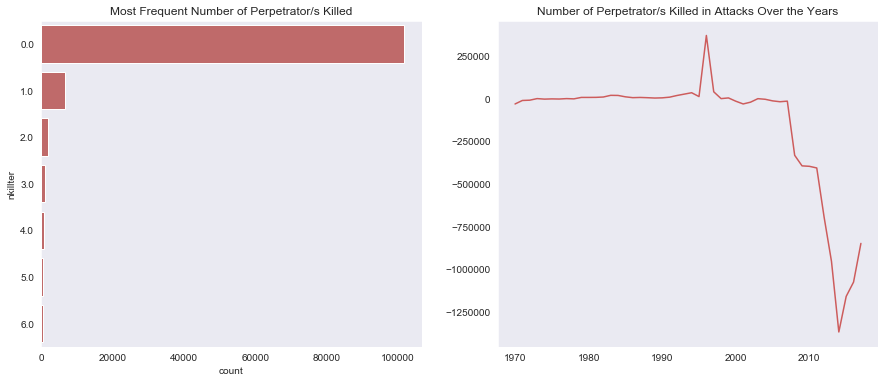

In [27]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(y=df['nkillter'].sort_values(), order=df['nkillter'].value_counts().nlargest(7).index, ax=ax[0], 
              color='indianred')
ax[0].set_title('Most Frequent Number of Perpetrator/s Killed')

sns.lineplot(data=df.groupby('iyear')['nperps'].sum(), ax=ax[1], color='indianred')
ax[1].set_title('Number of Perpetrator/s Killed in Attacks Over the Years')

Most terrorists also survive. The data for recent years is however unknown.

Region-wise attacks.

Text(0.5, 1.0, 'Region-Wise Attacks')

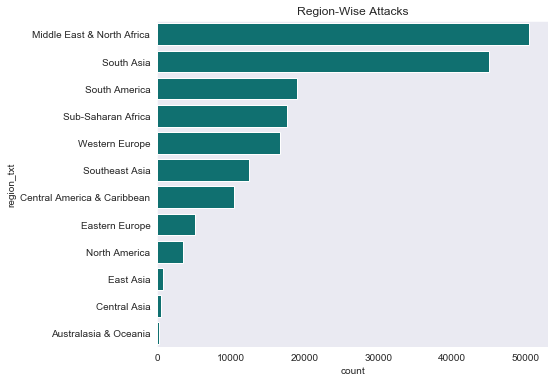

In [28]:
plt.figure(figsize=(7,6))
sns.countplot(y=df['region_txt'].sort_values(), order=df['region_txt'].value_counts().index, color='teal')
plt.title('Region-Wise Attacks')

It is observed that most attacks are carried out in the Middle East & North Africa regions, closely followed by South Asia.

Country-wise attacks.

In [29]:
df_country = df.groupby('country_txt').size().reset_index(name='counts')
map1 = px.choropleth(df_country, locations='country_txt', locationmode='country names', color='counts', 
                     color_continuous_scale='reds', title='Terrorism Around the World')
#map1.update_layout(margin={'r':0,'t':0,'l':0,'b':0})
map1.show()

It is observed that Iraq is the country with the most number of attacks, followed by Pakistan, Afghanistan and India.

Top 10 countries with the most number of terrorist attacks.

Text(0.5, 1.0, 'Top 10 Dangerous Countries')

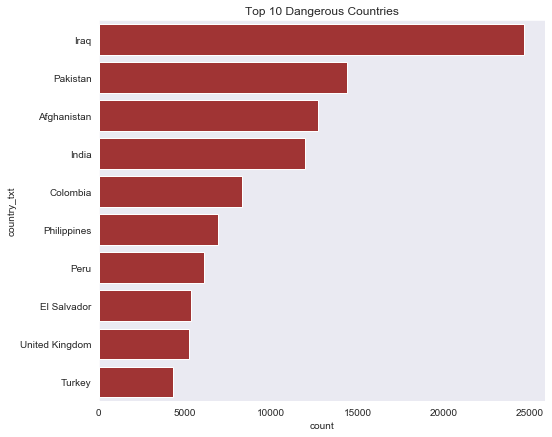

In [30]:
plt.figure(figsize=(8,7))
sns.countplot(y=df['country_txt'].sort_values(), order=df['country_txt'].value_counts().nlargest(10).index, color='firebrick')
plt.title('Top 10 Dangerous Countries')

Type of attacks leading to the most deaths.

Text(0.5, 1.0, 'Most Deadly Attacks')

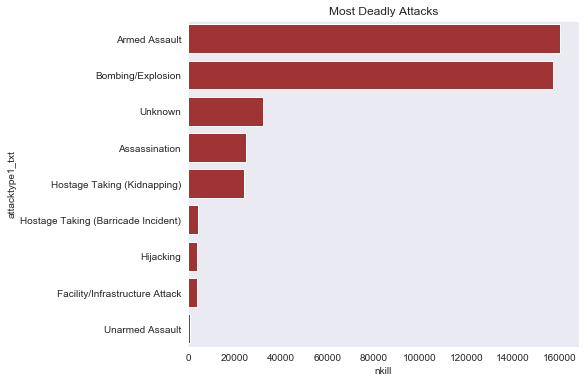

In [31]:
plt.figure(figsize=(7,6))
df_x = df.groupby('attacktype1_txt').agg({'nkill': np.sum})
df_x = df_x.sort_values('nkill', ascending=False)
sns.barplot(df_x['nkill'], df_x.index, color='firebrick')
plt.title('Most Deadly Attacks')

It is observed that armed assault and bombing are the deadliest types of terrorist attacks.

Exploring armed assault to see which countries and targets are at most risk for it.

Text(0.5, 1.0, 'Targets At Risk for Armed Assault')

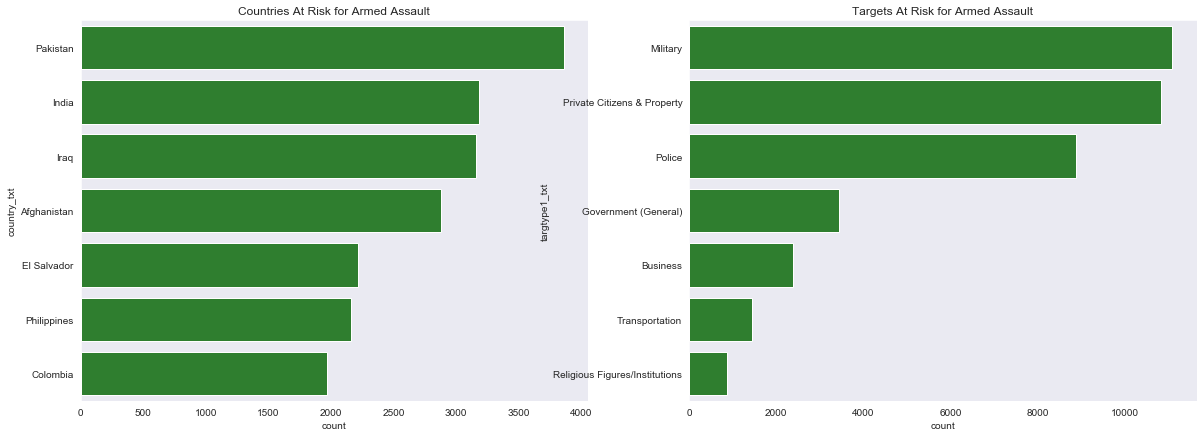

In [32]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
df_assault = df[df['attacktype1_txt'] == 'Armed Assault']
sns.countplot(y=df_assault['country_txt'], order=df_assault['country_txt'].value_counts().nlargest(7).index, 
              ax=ax[0], color='forestgreen')
ax[0].set_title('Countries At Risk for Armed Assault')

sns.countplot(y=df_assault['targtype1_txt'], order=df_assault['targtype1_txt'].value_counts().nlargest(7).index, 
              ax=ax[1], color='forestgreen')
ax[1].set_title('Targets At Risk for Armed Assault')

It is observed that armed assault is most common in Pakistan, followed by India. The most targeted group is the military followed by private citizens and property.

Exploring bombing to see which countries and targets are at most risk for it.

Text(0.5, 1.0, 'Targets At Risk for Bombing/Explosion')

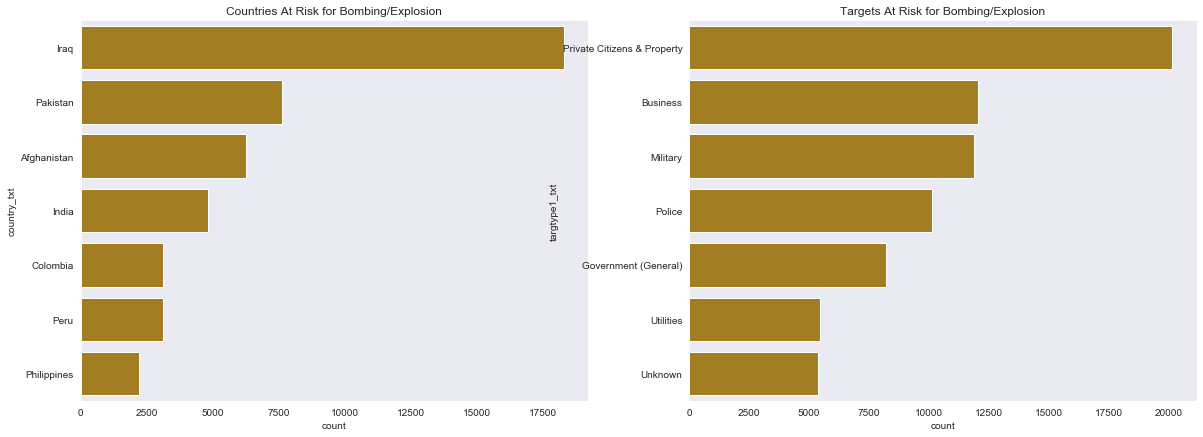

In [33]:
fig, ax = plt.subplots(1, 2, figsize=(20,7))
df_bombing = df[df['attacktype1_txt'] == 'Bombing/Explosion']
sns.countplot(y=df_bombing['country_txt'], order=df_bombing['country_txt'].value_counts().nlargest(7).index, 
              ax=ax[0], color='darkgoldenrod')
ax[0].set_title('Countries At Risk for Bombing/Explosion')

sns.countplot(y=df_bombing['targtype1_txt'], order=df_bombing['targtype1_txt'].value_counts().nlargest(7).index, 
              ax=ax[1], color='darkgoldenrod')
ax[1].set_title('Targets At Risk for Bombing/Explosion')

It is observed that bombing is most common in Iraq, followed by Pakistan. The most targeted group is the private citizens and property, followed by business.

Attacks leading to property damage and the extent of that damage.

Text(0.5, 1.0, 'Extent of Property Damage')

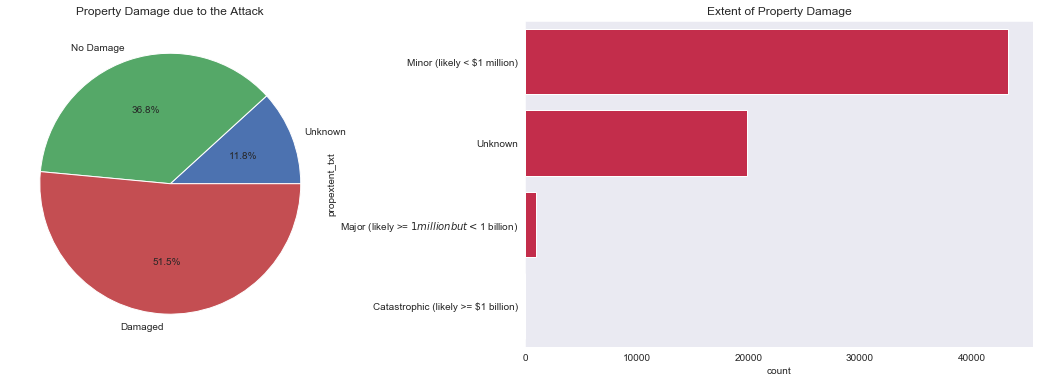

In [34]:
fig, ax = plt.subplots(1, 2, figsize=(20,6))

ax[0].pie(df.groupby('property').size(), labels=['Unknown', 'No Damage', 'Damaged'], autopct='%1.1f%%')
ax[0].set_title('Property Damage due to the Attack')

sns.countplot(y=df['propextent_txt'].sort_values(), order=df['propextent_txt'].value_counts().index, 
              ax=ax[1], color='crimson')
ax[1].set_title('Extent of Property Damage')

A significant amount of damage to property due to these attacks is observed. Most of the property damaged is likely less than 1 million. However, a significant amount is unknown.

Checking whether the attack was international, with respect to the perpetrator/s along with a comparision of the nationality of the perpetrator/s and the victim/s.

Text(0.5, 1.0, 'Nationality of the Perpetrator/s and the Victim/s')

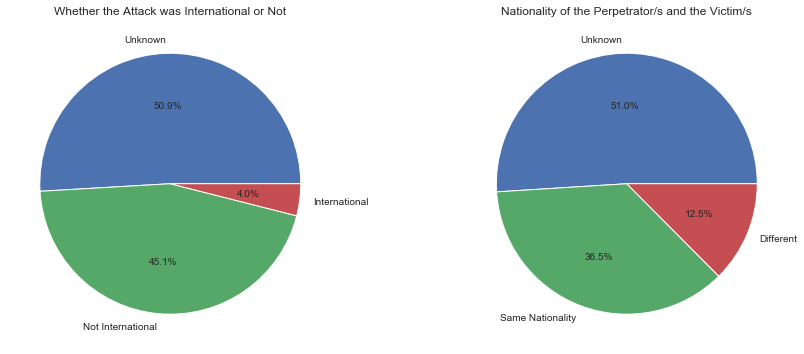

In [35]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

ax[0].pie(df.groupby('INT_LOG').size(), labels=['Unknown', 'Not International', 'International'], autopct='%1.1f%%')
ax[0].set_title('Whether the Attack was International or Not')

ax[1].pie(df.groupby('INT_IDEO').size(), labels=['Unknown', 'Same Nationality', 'Different'], autopct='%1.1f%%')
ax[1].set_title('Nationality of the Perpetrator/s and the Victim/s')

Most data is unknown, however, it is observed that very few times, the attackers decide to cross the borders in order to perform the attack. Hence, it is most likely that the attack was carried out by someone belonging to the same country.

A significant number of attacks are carried out on people with the same nationality as the attacker/s. However 12.5% attacks being carried out on people of different nationality is still significant.

Lets look into just kidnapping incidents now.

Percentage of attacks involving kidnapping and its change over the tears.

Text(0.5, 1.0, 'Kidnappings Over the Years')

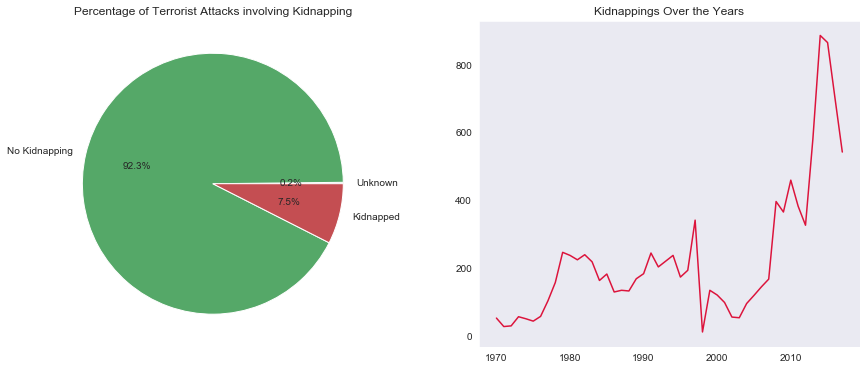

In [36]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))
                       
ax[0].pie(df.groupby('ishostkid').size(), labels=['Unknown', 'No Kidnapping', 'Kidnapped'], autopct='%1.1f%%')
ax[0].set_title('Percentage of Terrorist Attacks involving Kidnapping')

sns.lineplot(data=df.groupby('iyear')['ishostkid'].sum(), ax=ax[1], color='crimson')
ax[1].set_title('Kidnappings Over the Years')

Overall percentage says that kidnapping is not that frequent in case of terrorist attacks. However, there was a sharp spike in kidnappings after 2010 with a gradual decrease after that.

Most frequent number of people kidnapped and the number of days they are kept.

Text(0.5, 1.0, 'Number of days the kidnapped person is kept')

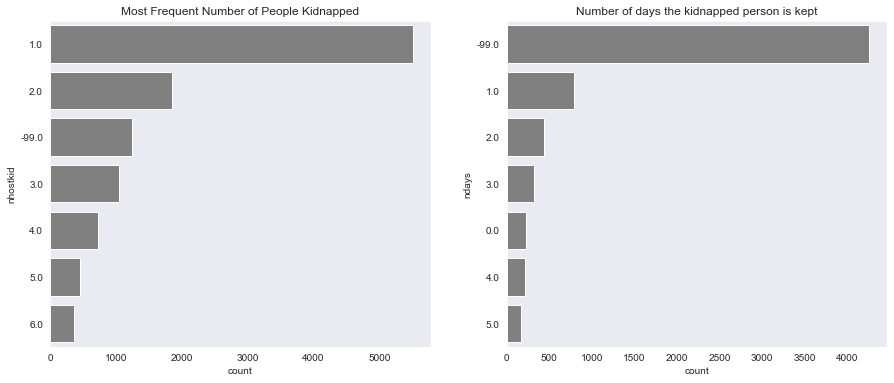

In [37]:
fig, ax = plt.subplots(1, 2, figsize=(15,6))

sns.countplot(y=df['nhostkid'].sort_values(), order=df['nhostkid'].value_counts().nlargest(7).index, ax=ax[0], color='gray')
ax[0].set_title('Most Frequent Number of People Kidnapped')

sns.countplot(y=df['ndays'].sort_values(), order=df['ndays'].value_counts().nlargest(7).index, ax=ax[1], color='gray')
ax[1].set_title('Number of days the kidnapped person is kept')

Most kidnappings involve one person. The number of days are unknown for most kidnapping, followed by one day.

Whether ransom was demanded.

(-1.107601485110315, 1.1003619754814435, -1.101933206470319, 1.107691585287003)

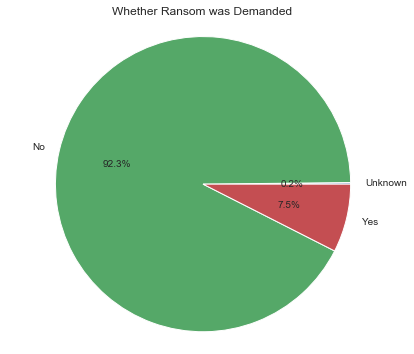

In [38]:
plt.figure(figsize=(7,6))
plt.pie(df.groupby('ishostkid').size(), labels=['Unknown', 'No', 'Yes'], autopct='%1.1f%%')
plt.title('Whether Ransom was Demanded')
plt.axis('equal')

The fact that 92.3% of the time ransom was not demanded brings out the fact that there may be ulterior motives at play.

Outcome of the kidnapping.

Text(0.5, 1.0, 'Outcome of the Kidnapping')

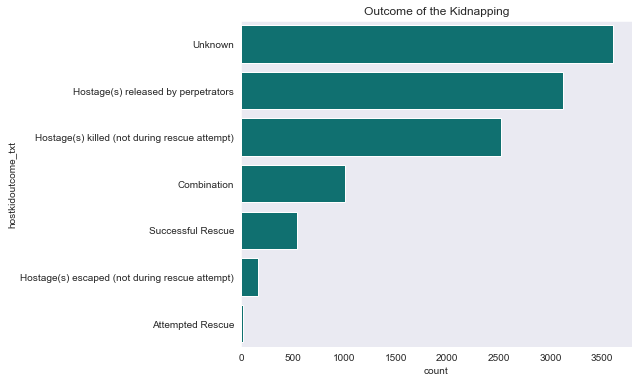

In [39]:
plt.figure(figsize=(7,6))
sns.countplot(y=df['hostkidoutcome_txt'].sort_values(), order=df['hostkidoutcome_txt'].value_counts().index, color='teal')
plt.title('Outcome of the Kidnapping')

The outcome is mostly unknown, closely followed by the hostages being released. However, it is also closely followed by the hostages being killed, which is concerning.

Most at risk countries for kidnapping.

Text(0.5, 1.0, 'Most At Risk Countries for Kidnapping')

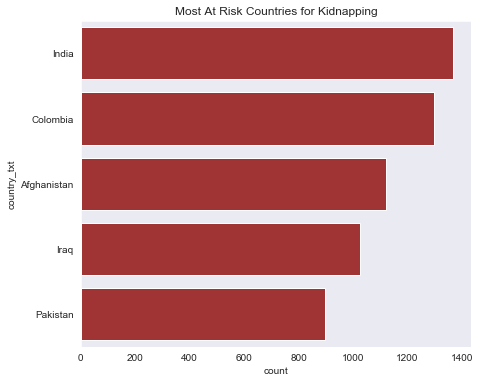

In [40]:
plt.figure(figsize=(7,6))
df_kid = df[df['ishostkid'] == 1.0]
sns.countplot(y=df_kid['country_txt'], order=df_kid['country_txt'].value_counts().nlargest(5).index, color='firebrick')
plt.title('Most At Risk Countries for Kidnapping')

India is the most at risk country for kidnapping, closely followed by Columbia.

Finally, exploring India because that's where I live.

In [41]:
df_india = df[df['country_txt'] == 'India']

In [42]:
BBox = (df_india.longitude.min(), df_india.longitude.max(),      
         df_india.latitude.min(), df_india.latitude.max())
BBox

(68.775724, 96.644737, 8.169375, 34.655639)

In [43]:
img = plt.imread('map2.png')

Concentration of attacks within India.

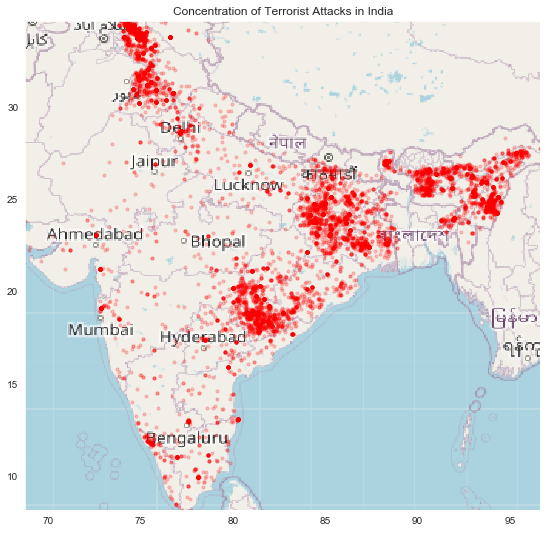

In [44]:
fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(df_india.longitude, df_india.latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Concentration of Terrorist Attacks in India')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(img, zorder=0, extent = BBox, aspect= 'equal')

It is observed that most terrorist attacks in India are concentrated in the northern and eastern regions

Kidnappings in India.

In [45]:
df_inkid = df_india[df_india['ishostkid'] == 1]

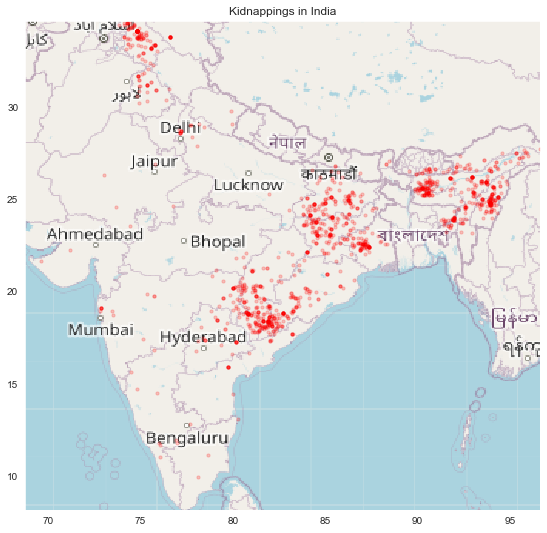

In [46]:
fig, ax = plt.subplots(figsize = (10,9))
ax.scatter(df_inkid.longitude, df_inkid.latitude, zorder=1, alpha= 0.2, c='r', s=10)
ax.set_title('Kidnappings in India')
ax.set_xlim(BBox[0],BBox[1])
ax.set_ylim(BBox[2],BBox[3])
ax.imshow(img, zorder=0, extent = BBox, aspect= 'equal')

Kidnappings in India are also focussed mostly in the northern and eastern states.